In [1]:
run step1_gatherData.py

no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
no data in csv
53


In [2]:
from copy import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats
from scipy.stats import norm
%matplotlib inline

### 1. Load in the summarized subject data

In [3]:
df = pd.read_pickle('gpData_v1.pkl')
NrSbj = len(df.sbjId.unique())
print('A total of ' + str(NrSbj) + ' subjects')

A total of 53 subjects


#### 1a. Exclude subjects with low task-switching accuracy (<70%)

In [4]:
#%% do a fist pass to exclude subjects with low cued task accuracy
goodSbj=[]
excludeSbj=[]
for S in np.unique(df.sbjId):
    D = df.loc[df.sbjId==S]    
    if D[D.phase=='TaskSw'].sbjACC.mean()*100 > 60:
        goodSbj.append(S)
    else:
        excludeSbj.append(S)
for S in excludeSbj:
    df.drop(df[df.sbjId==S].index, axis=0, inplace=True)
validSCNT = len(np.unique(df.sbjId))
print('After excluding subjects with poor performance: A total of ' + str(validSCNT) + ' subjects')

After excluding subjects with poor performance: A total of 40 subjects


### 2. Look at Task-switching data:

Overall accuracy for the task-switching control task was 74.34%
Overall RT (correct trials) for the task-switching control task was 721.83ms


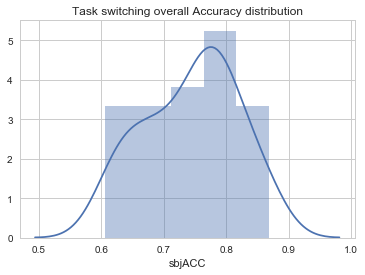

In [5]:
df_tskSw = df.loc[df.phase=='TaskSw',:]
sbj_tsACC = df_tskSw.groupby('sbjId').sbjACC.mean()
#print(sbj_tsACC)  # might need to exclude low accuracy subjects later on - lower than 70% or 65%
sns.distplot(sbj_tsACC)
plt.title('Task switching overall Accuracy distribution')
TS_meanACC = df_tskSw.groupby('sbjId').sbjACC.mean().mean()*100
TS_meanRT = df_tskSw.loc[df_tskSw.sbjACC==1,:].groupby('sbjId').sbjRT.mean().mean()
print('Overall accuracy for the task-switching control task was ' + '{:.2f}'.format(TS_meanACC) + '%')
print('Overall RT (correct trials) for the task-switching control task was ' + '{:.2f}'.format(TS_meanRT) + 'ms')

#### 2a. Task-switching ACC as a function of 2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat) 

------Group mean ACC--------
respComp  trialType
RC        switch       79.1875
          repeat       88.6250
RIC       switch       54.1875
          repeat       75.3750
Name: sbjACC, dtype: float64


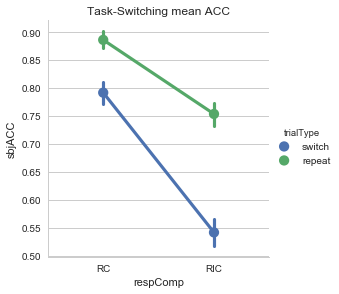

In [6]:
sns.factorplot(x='respComp',y='sbjACC', data=df_tskSw, hue='trialType')
plt.title("Task-Switching mean ACC")
condM_ts_acc = df_tskSw.groupby(['sbjId','respComp','trialType']).sbjACC.mean().reset_index()  
# a dataframe of subject x condition 
gpResult_ts_acc  = condM_ts_acc.groupby(['respComp','trialType']).sbjACC.mean()*100
print('------Group mean ACC--------')
print(gpResult_ts_acc)

#### 2b. Task-switching RT as a function of 2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat) 

------Group mean RT--------
respComp  trialType
RC        switch       733.514174
          repeat       678.791605
RIC       switch       786.730363
          repeat       717.712696
Name: sbjRT, dtype: float64


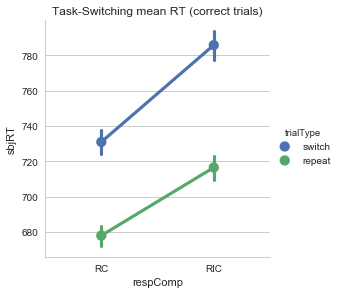

In [7]:
sns.factorplot(x='respComp',y='sbjRT', data=df_tskSw.loc[df_tskSw.sbjACC==1,:], hue='trialType')
plt.title("Task-Switching mean RT (correct trials)")
condM_ts_rt = df_tskSw.loc[df_tskSw.sbjACC==1,:].groupby(['sbjId','respComp','trialType']).sbjRT.mean().reset_index()
# a dataframe of subject x condition 
gpResult_ts_rt = condM_ts_rt.groupby(['respComp','trialType']).sbjRT.mean()
print('------Group mean RT--------')
print(gpResult_ts_rt)

### 3. Look at Subsequent Memory Data

In [8]:
df_mem = df.loc[df.phase=='Mem',:]
mem_meanACC = df_mem.groupby('sbjId').sbjACC.mean().mean()*100
mem_meanRT = df_mem.groupby('sbjId').sbjRT.mean().mean()
print('Overall accuracy for the subsequent memory task (all items: old and new) was ' + '{:.2f}'.format(mem_meanACC) + '%')
print('Overall RT (all trials) for the subsequent memory task was ' + '{:.2f}'.format(mem_meanRT) + 'ms')

Overall accuracy for the subsequent memory task (all items: old and new) was 70.17%
Overall RT (all trials) for the subsequent memory task was 962.57ms


#### 3a. Correct Rejection (CR) Rate (new item and rated as 'new')

False Alarm Rate was 25.44%


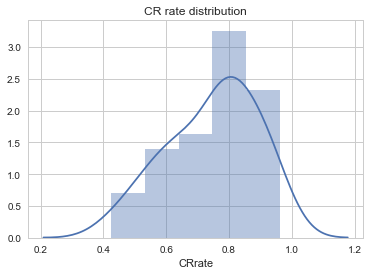

In [9]:
condM_mem_CRrate = df_mem.loc[df_mem.memCond=='new',:].groupby('sbjId').sbjACC.mean().reset_index()
condM_mem_CRrate.rename(columns={'sbjACC': 'CRrate'}, inplace=True)
# a table of subject x condition 
#print(sbj_CRrate)  # if a subject's correct rejection rate is too low, might need to exclude this subject later on
sns.distplot(condM_mem_CRrate.CRrate)
plt.title('CR rate distribution')
gpResult_CRrate = condM_mem_CRrate.CRrate.mean()*100
print('False Alarm Rate was ' + '{:.2f}'.format(100-gpResult_CRrate) + '%')

#### 3b. Hit rate (old item and rated as 'old') as a function of  2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat) 

------Group mean Hit Rate--------
respComp  trialType
RC        switch       68.3125
          repeat       68.8125
RIC       switch       65.3125
          repeat       69.4375
Name: Hits, dtype: float64


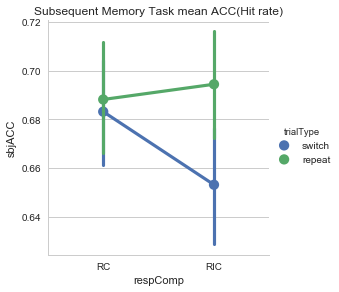

In [10]:
df_old = df_mem.loc[df_mem.memCond!='new']
condM_mem_hits = df_old.groupby(['sbjId','respComp','trialType']).sbjACC.mean().reset_index()
condM_mem_hits.rename(columns={'sbjACC': 'Hits'}, inplace=True)
# a table of subject x condition 
sns.factorplot(x='respComp',y='sbjACC', data=df_old, hue='trialType')
plt.title("Subsequent Memory Task mean ACC(Hit rate)")
gpResult_hits = condM_mem_hits.groupby(['respComp','trialType']).Hits.mean()*100
print('------Group mean Hit Rate--------')
print(gpResult_hits)

In [11]:
a = np.array(condM_mem_hits.loc[(condM_mem_hits.respComp=='RC') & (condM_mem_hits.trialType=='switch'),'Hits'])
b = np.array(condM_mem_hits.loc[(condM_mem_hits.respComp=='RC') & (condM_mem_hits.trialType=='repeat'),'Hits'])
c = np.array(condM_mem_hits.loc[(condM_mem_hits.respComp=='RIC') & (condM_mem_hits.trialType=='switch'),'Hits'])
d =  np.array(condM_mem_hits.loc[(condM_mem_hits.respComp=='RIC') & (condM_mem_hits.trialType=='repeat'),'Hits'])
simple_inX_test = stats.ttest_rel(a-b,c-d)
print(simple_inX_test.pvalue)

0.0952433401755


#### 3c. d prime as a function of  2 (respComp: RC, RIC ) x 2 (Trial Type: switch/repeat) 

------Memory d prime--------
respComp  trialType
RC        switch       1.266226
          repeat       1.283951
RIC       switch       1.180547
          repeat       1.314269
Name: dprime, dtype: float64


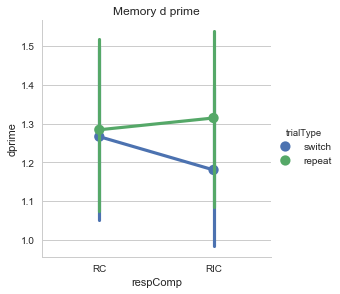

In [12]:
condM_mem_hits['zHits'] = stats.norm.ppf(condM_mem_hits.Hits)
condM_mem_CRrate['zFA'] = stats.norm.ppf(1-condM_mem_CRrate.CRrate)
condM_mem_dprime = condM_mem_hits.merge(condM_mem_CRrate,right_on = 'sbjId', left_on = 'sbjId',how = 'outer')
condM_mem_dprime['dprime'] = condM_mem_dprime['zHits']-condM_mem_dprime['zFA']  
# a table of subject x condition 
gpResult_mem_dprime = condM_mem_dprime.groupby(['respComp','trialType']).dprime.mean()
sns.factorplot(x='respComp',y = 'dprime', data=condM_mem_dprime, hue='trialType')
plt.title('Memory d prime')
print('------Memory d prime--------')
print(gpResult_mem_dprime)

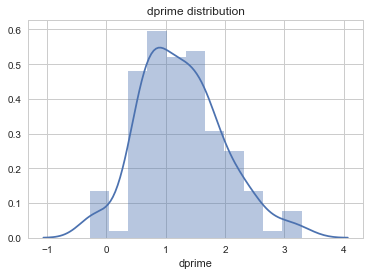

In [13]:
sns.distplot(condM_mem_dprime.dprime)
plt.title('dprime distribution')

In [14]:
condM_mem_dprime.head(8)

,sbjId,respComp,trialType,Hits,zHits,CRrate,zFA,dprime
0,1.0,RC,switch,0.700,0.524401,0.7625,-0.714367,1.238768
1,1.0,RC,repeat,0.825,0.934589,0.7625,-0.714367,1.648957
2,1.0,RIC,switch,0.625,0.318639,0.7625,-0.714367,1.033007
3,1.0,RIC,repeat,0.700,0.524401,0.7625,-0.714367,1.238768
4,2.0,RC,switch,0.625,0.318639,0.7625,-0.714367,1.033007
5,2.0,RC,repeat,0.725,0.597760,0.7625,-0.714367,1.312128
6,2.0,RIC,switch,0.525,0.062707,0.7625,-0.714367,0.777074
7,2.0,RIC,repeat,0.625,0.318639,0.7625,-0.714367,1.033007


#### (3d. Subsequent memory (RT) as a function of  memCond)

------Memory RT--------
memCond
old-switch-RIC    957.708708
old-switch-RC     952.891660
old-repeat-RIC    947.860888
old-repeat-RC     955.386607
new               980.816617
Name: sbjRT, dtype: float64


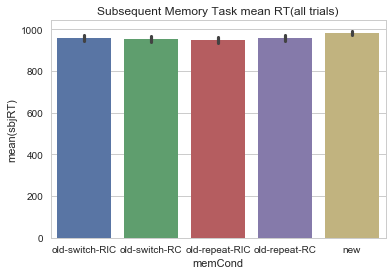

In [15]:
sns.barplot(x='memCond',y='sbjRT', data=df_mem)
plt.title("Subsequent Memory Task mean RT(all trials)")
condM_mem_rt = df_mem.groupby(['sbjId','memCond']).sbjRT.mean().reset_index()
# a table of subject x condition 
gpResult_mem_rt = condM_mem_rt.groupby(['memCond']).sbjRT.mean()
print('------Memory RT--------')
print(gpResult_mem_rt)